<h1>Boston House Price Prediction </h1>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Boston1.csv')   

In [4]:
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
# lstat = > % of population in the lower status
# medv =>House price
data1 = data[['lstat','medv']]
data1.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [8]:
import matplotlib.pyplot as plt

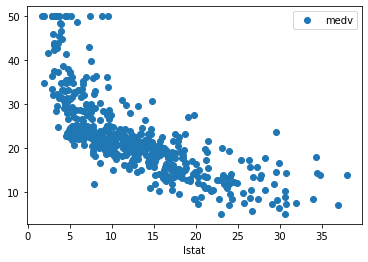

In [9]:
data1.plot(x = 'lstat', y = 'medv', style = 'o')
plt.show()

### Prices of the house is more when the percentage of people in lower status are less

In [10]:
data1.corr()

,lstat,medv
lstat,1.000000,-0.737663
medv,-0.737663,1.000000


## Single Linear Regression Model

## Steps:

### 1.Train test data
### 2.Fit our model
### 3.test model

In [11]:
data1.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [12]:
# Splitting the data => Train and test data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Get my X(independent) and Y (dependent dataframes)

In [15]:
X = pd.DataFrame(data1['lstat'])
y = pd.DataFrame(data1['medv'])

In [16]:
X.size, y.size

(506, 506)

In [17]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [19]:
X_train.head()

,lstat
42,5.81
58,6.86
385,30.81
78,12.34
424,17.16


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

## Fitting the model, training the model

In [22]:
model.fit(X_train,y_train) 

LinearRegression()

### Best fit line. Line which will be plotted which has minimum errors.
### line equation y= B0+B1x+B2x2+B3x3

In [23]:
# Intercept
model.intercept_ #B0

array([34.33497839])

In [24]:
# Coefficients
model.coef_#B1

array([[-0.92441715]])

### y= (34.33497839)-(0.92441715) x1

## Test data to test accuracy/performnce of my model

### Here we are predicting y with the help of X_test data which model hasn't trained or not even seen

In [47]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[27.37411725],
       [27.69766325],
       [16.95593597],
       [26.84719947],
       [24.91516763]])

### Actual Y

In [49]:
y_test.head()

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


## Metrics

In [51]:
from sklearn import metrics
import numpy as np

## MAE

In [52]:
metrics.mean_absolute_error(y_test,y_pred)

5.078127727696938

## MSE

In [53]:
metrics.mean_squared_error(y_test,y_pred) 

46.99482091954711

### Certain data points are having high error as 5^2 =25 but we got 46

## Always compare MAE and RMSE

## RMSE

In [54]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

6.855276866731723

## R Square  

In [57]:
metrics.r2_score(y_test,y_pred)

0.5244757432765152

## Homoscadesticity

In [58]:
import matplotlib.pyplot as plt

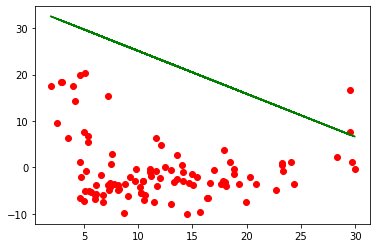

In [66]:
plt.plot(X_test, y_pred, c = 'g')
plt.scatter(X_test, y_test-y_pred, color = 'r')

## crim
### per capita crime rate by town.

## zn
### proportion of residential land zoned for lots over 25,000 sq.ft.

## indus
### proportion of non-retail business acres per town.

## chas
### Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

## nox
### nitrogen oxides concentration (parts per 10 million).

## rm
### average number of rooms per dwelling.

## age
### proportion of owner-occupied units built prior to 1940.

## dis
### weighted mean of distances to five Boston employment centres.

## rad
### index of accessibility to radial highways.

## tax
### full-value property-tax rate per 10,000 dollar.

## ptratio
### pupil-teacher ratio by town.

## black
#### 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

## lstat
### lower status of the population (percent).

## medv
### median value of owner-occupied homes in $1000s.

In [25]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [27]:
import seaborn as sns

<AxesSubplot:>

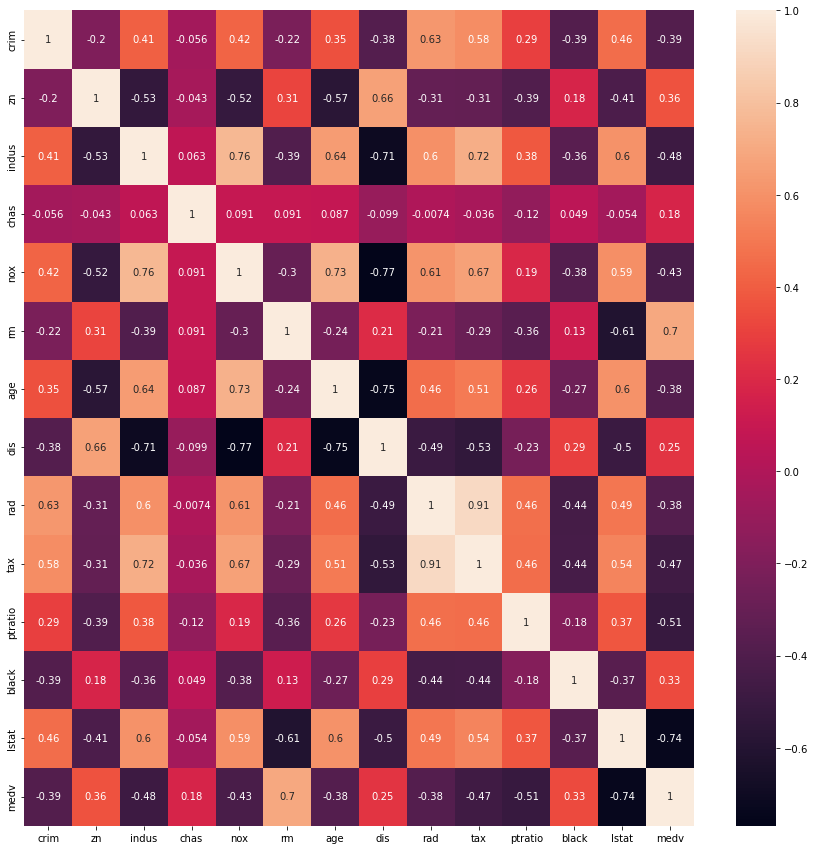

In [28]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)

### The indus, nox, rm, tax, ptratio, lstat are selected

In [43]:
data2 = data[['indus','nox','rm','tax','ptratio','lstat','medv']]

### Check for linearity
### Plot the x and y

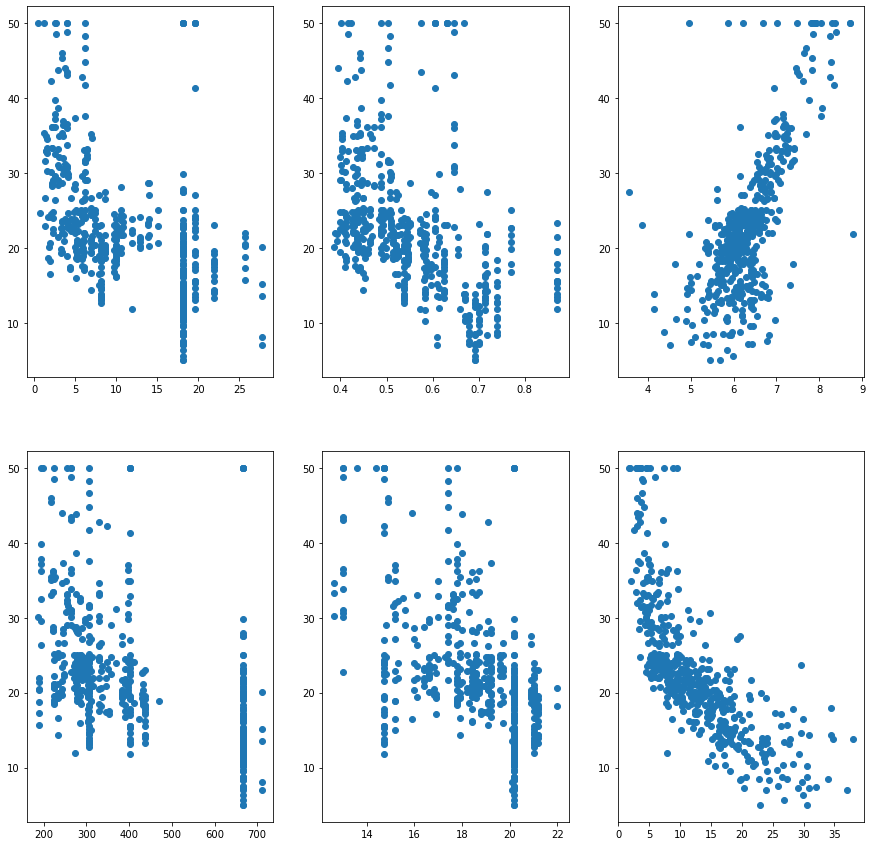

In [44]:
fig = plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.scatter(data2['indus'],data2['medv'])
plt.subplot(2,3,2)
plt.scatter(data2['nox'],data2['medv'])
plt.subplot(2,3,3)
plt.scatter(data2['rm'],data2['medv'])
plt.subplot(2,3,4)
plt.scatter(data2['tax'],data2['medv'])
plt.subplot(2,3,5)
plt.scatter(data2['ptratio'],data2['medv'])
plt.subplot(2,3,6)
plt.scatter(data2['lstat'],data2['medv'])

## Based on the above plots, we will remove varible tax and ptratio

In [45]:
data2[['indus','nox','rm','lstat']].corr()

,indus,nox,rm,lstat
indus,1.000000,0.763651,-0.391676,0.603800
nox,0.763651,1.000000,-0.302188,0.590879
rm,-0.391676,-0.302188,1.000000,-0.613808
lstat,0.603800,0.590879,-0.613808,1.000000


## Multicollinearity Multicollinearity

<AxesSubplot:>

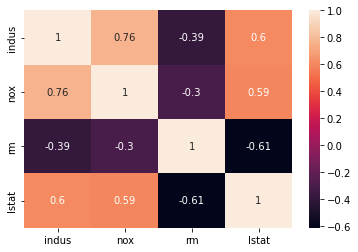

In [46]:
sns.heatmap(data2[['indus','nox','rm','lstat']].corr(), annot = True)

## Based on the above graph,we will eliminate nox

In [47]:
data2.head()

,indus,nox,rm,tax,ptratio,lstat,medv
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,5.33,36.2


In [48]:
type(X)

pandas.core.frame.DataFrame

In [49]:
# Split training and testing
X = pd.DataFrame(data2[['indus','rm','lstat']])
y = pd.DataFrame(data2['medv'])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404, 1)
(102, 1)


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
model.intercept_

array([0.93519243])

In [57]:
model.coef_

array([[-0.05143861,  4.8158014 , -0.64256625]])

In [58]:
X.head()

,indus,rm,lstat
0,2.31,6.575,4.98
1,7.07,6.421,9.14
2,7.07,7.185,4.03
3,2.18,6.998,2.94
4,2.18,7.147,5.33


In [59]:
y_pred = model.predict(X_test)

In [110]:
from sklearn import metrics

In [112]:
metrics.mean_absolute_error(y_test, y_pred)

3.5761982123110134

In [114]:
metrics.mean_squared_error(y_test,y_pred)

23.367460486350687

In [115]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.833990120630232

In [119]:
metrics.r2_score(y_test,y_pred)

0.7206843252479394

## How much variance in the data is explained by your model => R Square

## Adjusted R Square
## n => no of observation/total rows
## k => no of independent features
## 1 -((1 - R2) * (n-1))/(n-k-1)

In [124]:
r2 = metrics.r2_score(y_test,y_pred)

In [128]:
len(X_test.iloc[0])

3

## Adjusted R Squared

In [129]:
1 - ((1 - r2) * (len(X_test) - 1))/(len(X_test) - len(X_test.iloc[0] - 1))

0.7150415843438573